# (공부) R을 활용한 데이터 과학(1~3장)
> 작성 중

- toc:true
- branch: master
- badges: true
- comments: true
- author: kimha02
- categories: [R]

---------------------

## ggplot2
- ggplot2 ⊂ tidyverse
- `+` 표시는 항상 마지막에 넣어준다

### 1. geom_point

0) 기본 형태
> ``` python
    ggplot(data = NAME)+
    geom_point(mapping = aes(x = NAME, y = NAME))
```  

In [4]:
library(tidyverse)

In [33]:
#install.packages('patchwork')
library(patchwork)

In [7]:
dia<-diamonds; str(dia)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


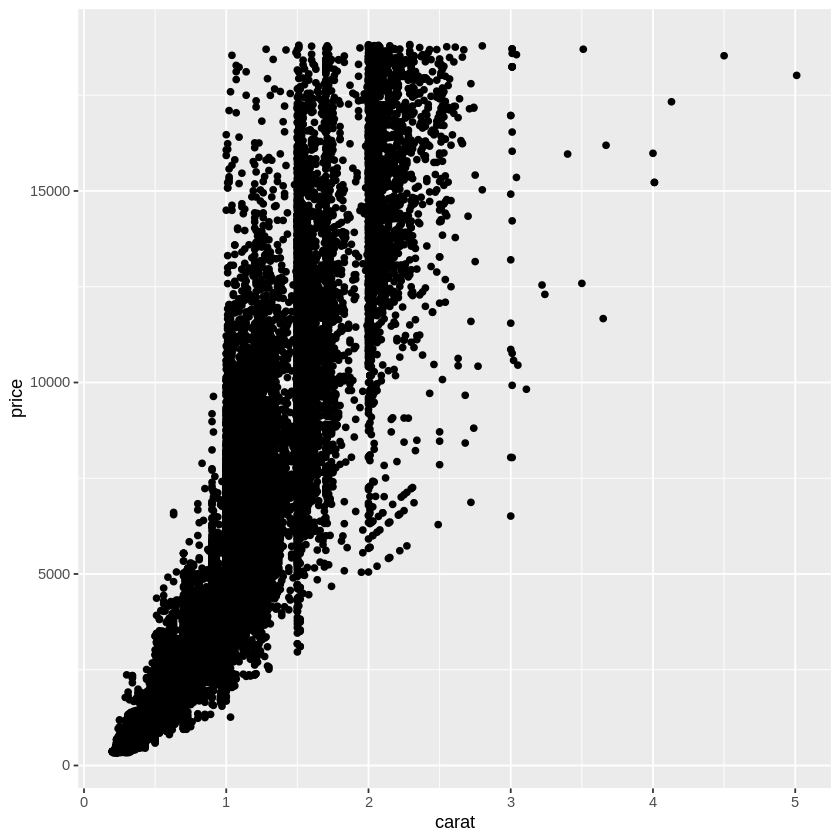

In [11]:
ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price))

1) 그룹별로 차이를 주고 싶을 때  
`-` aes 안에 심미성 요소 를 넣어준다  
`-` `color`, `size`, `alpha`, `shape`

In [35]:
#color
a<-ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price, color=cut))+ggtitle('color')
#color_1가지 색으로만
b<-ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price), color="blue")+ggtitle('one_color')
#size_크기
c<-ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price, size=cut))+ggtitle('size')
#alpha_투명도
d<-ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price, alpha=cut))+ggtitle('alpha')
#shape_점모양
e<-ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price, shape=cut))+ggtitle('shape')  #shape은 6개까지만

Warning message:
“Using shapes for an ordinal variable is not advised”


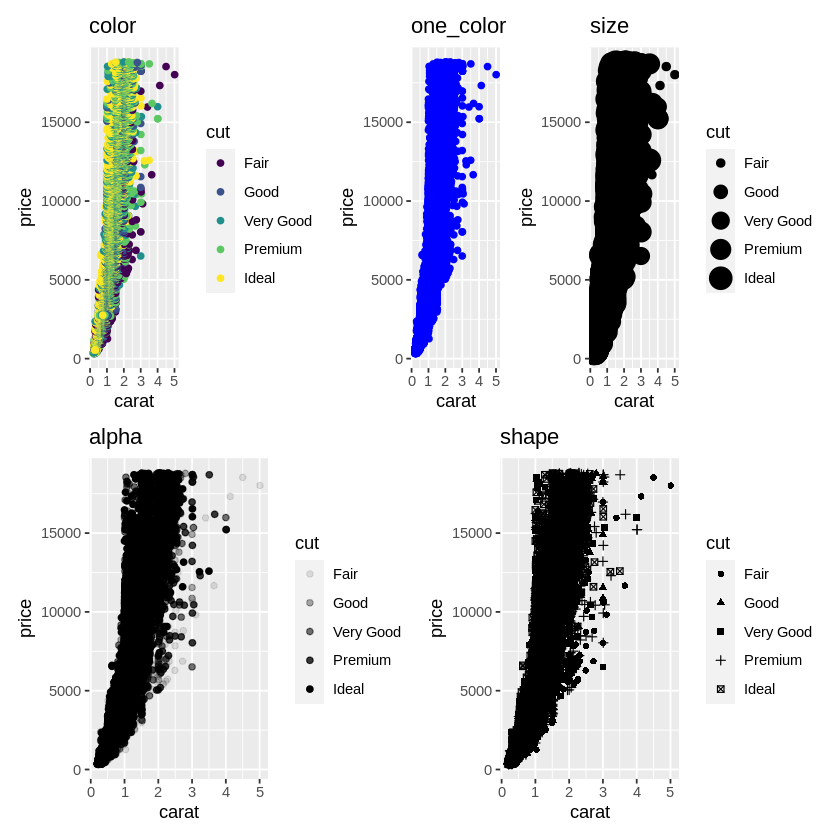

In [42]:
(a+b+c)/(d+e)   #patchwork   

2) 오버 플로팅을 방지하고 싶을 때  
`-` `position = "jitter"`로 조금씩 움직일 수 있다  
`-` `geom_jitter` 도 가능

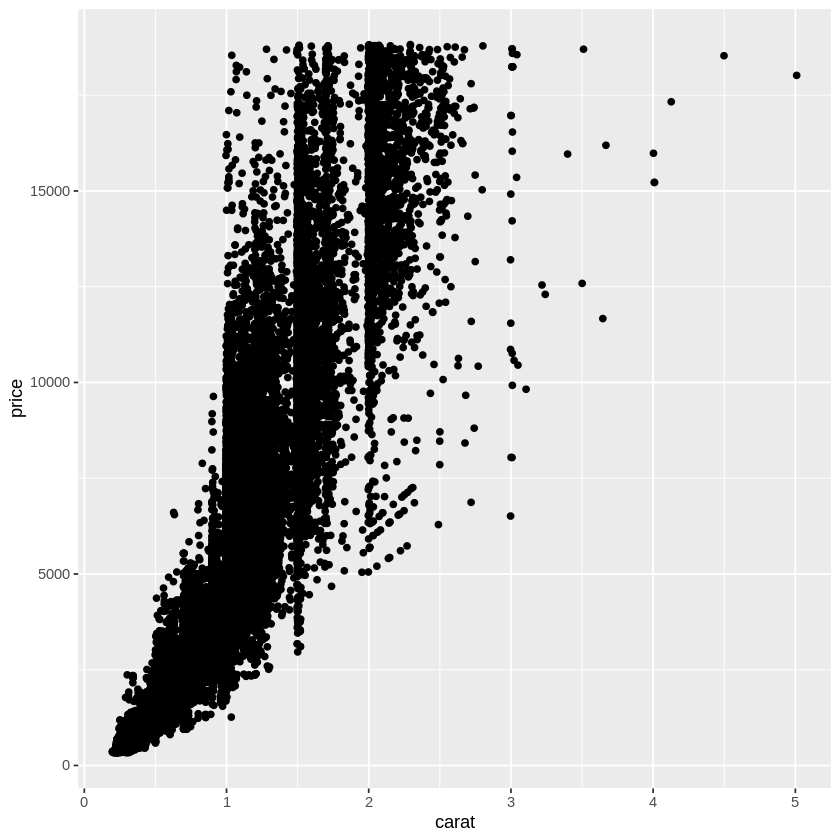

In [43]:
ggplot(data=dia)+
geom_point(mapping=aes(x=carat, y=price), position="jitter")